### arima -> seasonal arima SARIMA -> SARIMAX  &  autoarima

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

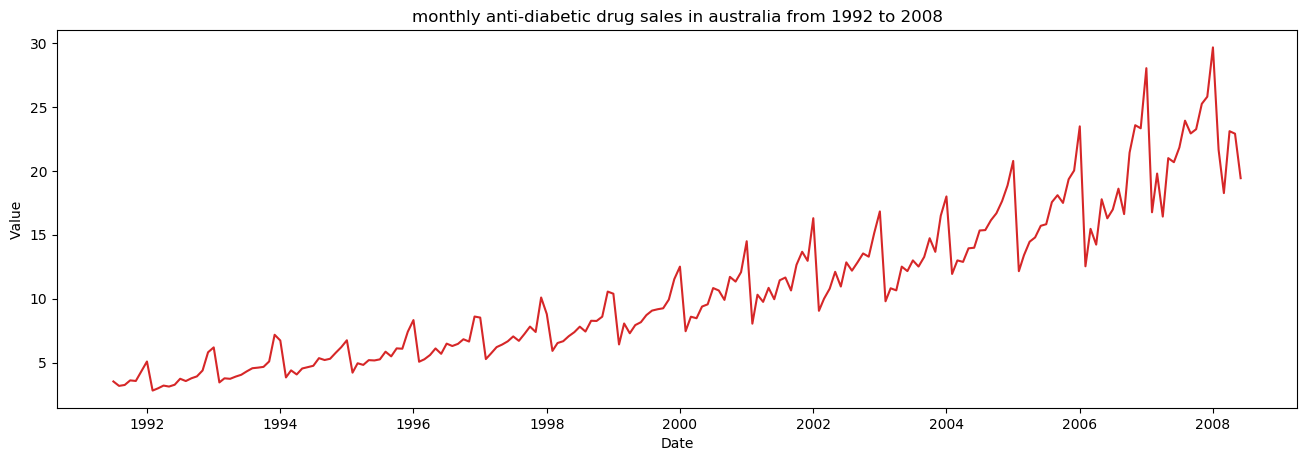

In [2]:
# import as series
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates = ['date'], index_col = 'date')

# plot
def plot_df(df, x, y, title = '', xlabel = 'Date', ylabel = 'Value', dpi = 100):
    plt.figure(figsize = (16, 5), dpi = dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    
plot_df(df, x = df.index, y = df.value, title = 'monthly anti-diabetic drug sales in australia from 1992 to 2008')


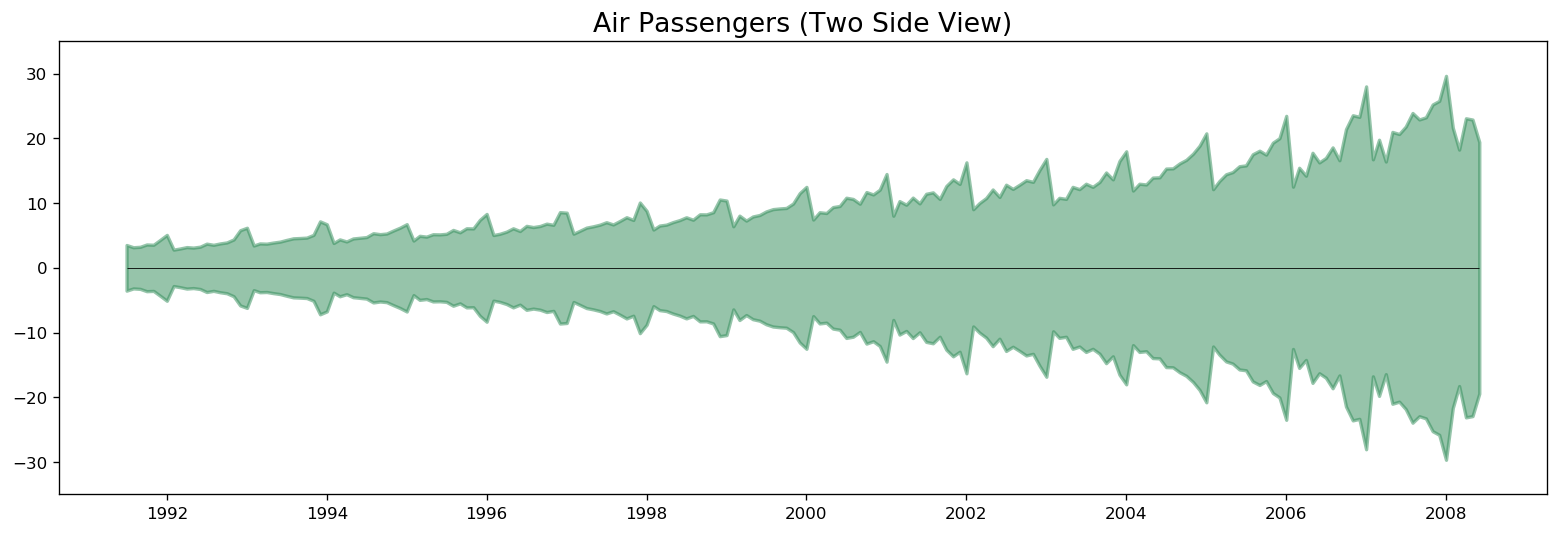

In [11]:
# show on both side
x = df.index
y1 = df.value

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-35, 35)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

In [13]:
# seasonal plot
df.reset_index(inplace = True)

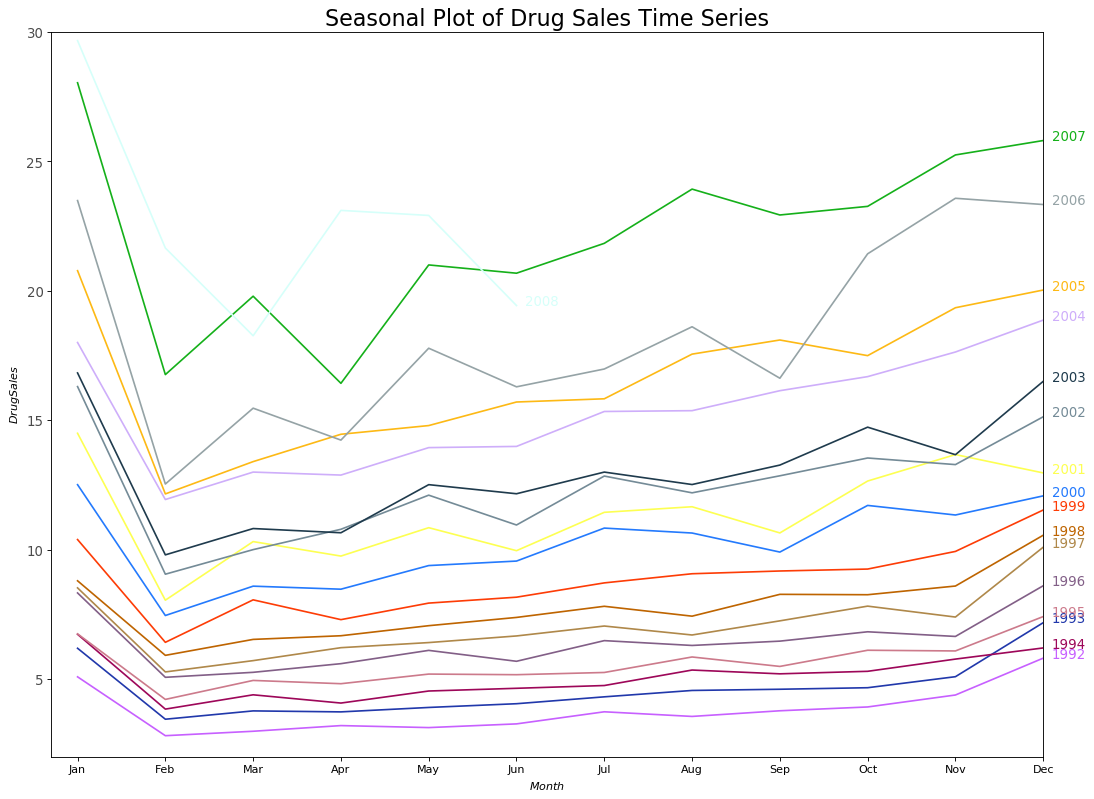

In [16]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

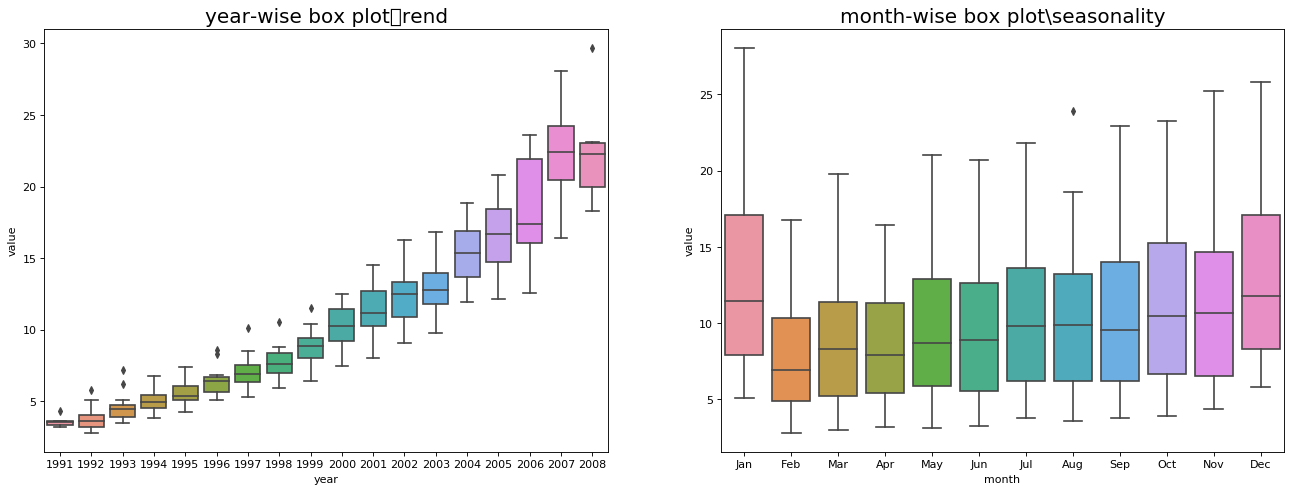

In [18]:
# boxplot: month wise (seasonal) & year wise (trend)
fig, axes = plt.subplots(1, 2, figsize = (20, 7), dpi = 80)
sns.boxplot(x = 'year', y = 'value', data = df, ax = axes[0])
sns.boxplot(x = 'month', y = 'value', data = df.loc[~df.year.isin([1991, 2008]), :])

axes[0].set_title('year-wise box plot\trend', fontsize = 18)
axes[1].set_title('month-wise box plot\seasonality', fontsize = 18)
plt.show()

### base level + trend + seasonality + error

### additive: value = ..+..
### multiplicative: value = ..*..

### decompose

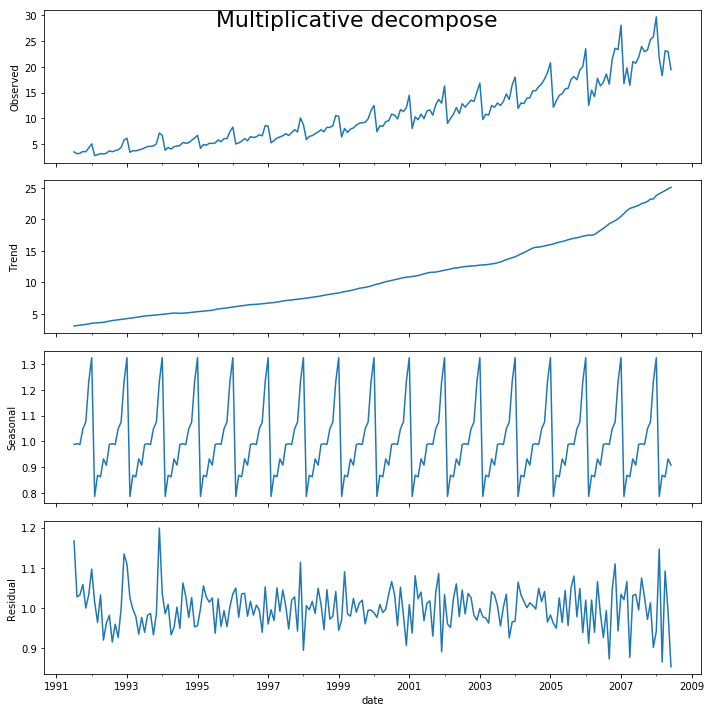

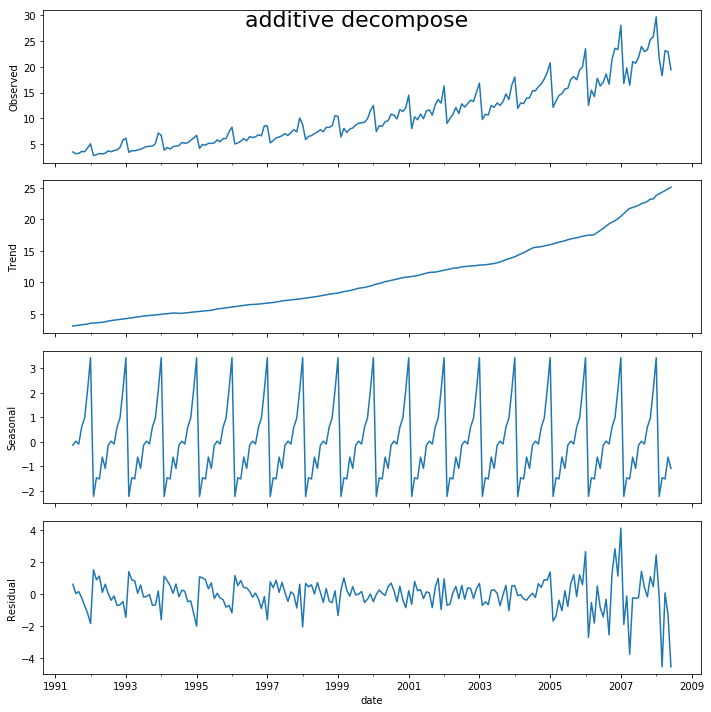

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# multiplicative decomposition
result_mul = seasonal_decompose(df['value'], model = 'multiplicative', extrapolate_trend = 'freq')  # take care of missing values
# additive
result_add  = seasonal_decompose(df['value'], model = 'additive', extrapolate_trend = 'freq')

# plot
plt.rcParams.update({'figure.figsize':(10, 10)})
result_mul.plot().suptitle('Multiplicative decompose', fontsize = 22)
result_add.plot().suptitle('additive decompose', fontsize = 22)
plt.show()

# multiplicative' residuals are more random
# additive's residuaals have some pattern left
# so mul is better in this case

In [21]:
# dataframe
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis = 1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_value']
df_reconstructed.head()

,seas,trend,resid,actual_value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


### stationary and non-stationary

### make a non-stationary series stationary before forecasting

### linear regression works best if the predictors are not correlated against each other

### The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

### The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

In [23]:
from statsmodels.tsa.stattools import adfuller, kpss

# adf test
result = adfuller(df.value.values, autolag = 'AIC')
print(f'adf statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('critial values:')
    print(f'    {key}, {value}')

# kpss test
result = kpss(df.value.values, regression = 'c')
print('\nkpss statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('critial values:')
    print(f'    {key}, {value}')

adf statistic: 3.1451856893067296
p-value: 1.0
critial values:
    1%, -3.465620397124192
critial values:
    5%, -2.8770397560752436
critial values:
    10%, -2.5750324547306476

kpss statistic: 1.313675
p-value: 0.010000
critial values:
    10%, 0.347
critial values:
    5%, 0.463
critial values:
    2.5%, 0.574
critial values:
    1%, 0.739


C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### noise is completely random with a mean of 0. diff from stationary

### detrend

Text(0.5,1,'drug sales detrended by substracting the least squares fit')

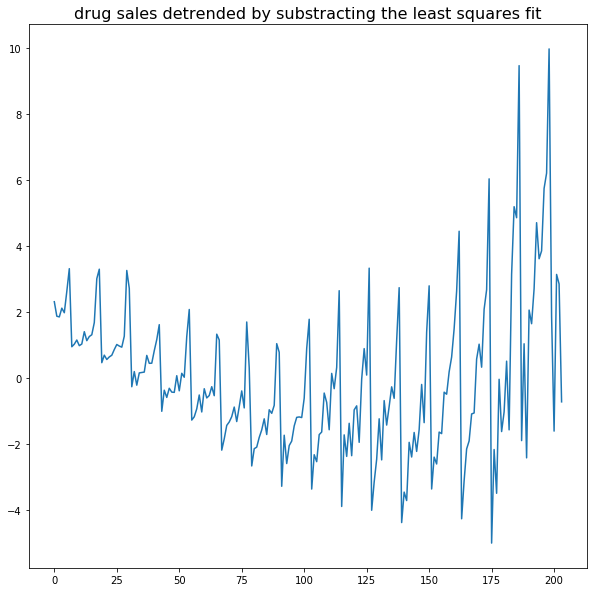

In [25]:
# scipy
from scipy import signal
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('drug sales detrended by substracting the least squares fit', fontsize = 16)


Text(0.5,1,'drug sales detrended by substracting the trend component')

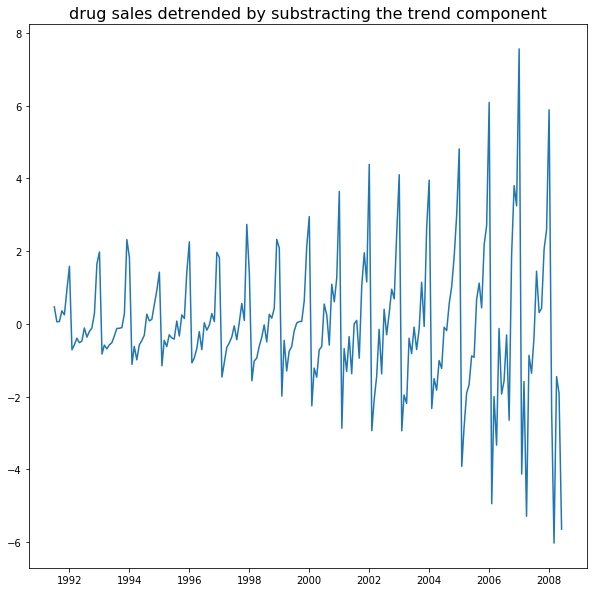

In [26]:
# statsmodels
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('drug sales detrended by substracting the trend component', fontsize = 16)


### deseasonalize

[]

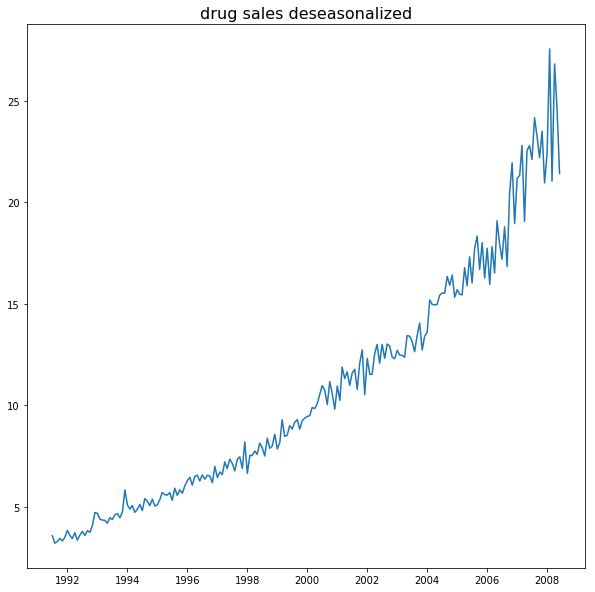

In [27]:
deseasonalized = df.value.values / result_mul.seasonal
plt.plot(deseasonalized)
plt.title('drug sales deseasonalized', fontsize = 16)
plt.plot()

### autocorrelation function ACF

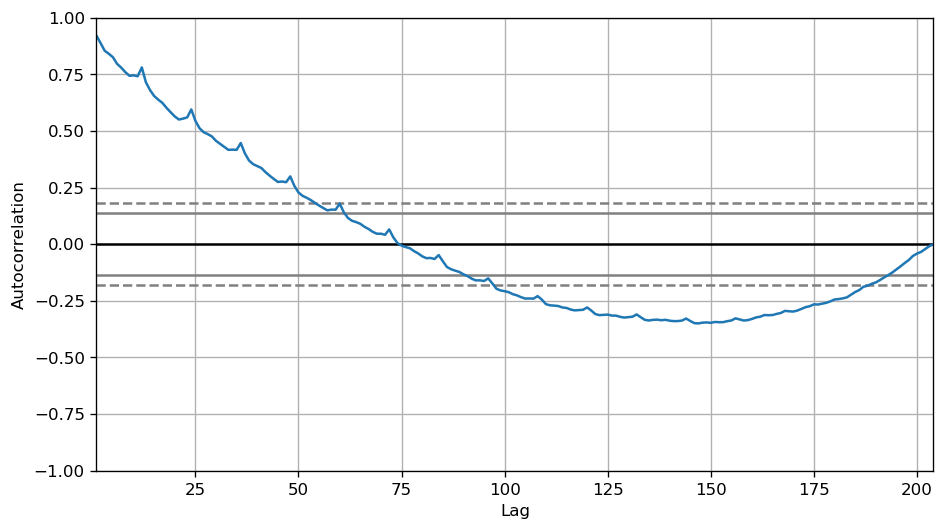

In [28]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9, 5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

### treat missing value
### Backward Fill, Linear Interpolation, Quadratic interpolation, Mean of nearest neighbors, Mean of seasonal couterparts

In [32]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplot(7, 1, sharex = True, figsize = (10, 12))
plt.rcParams.update({'xtick.bottom':False})

# 1. actual
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

HTTPError: HTTP Error 400: Bad Request

### ACF: Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

### PCF: Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

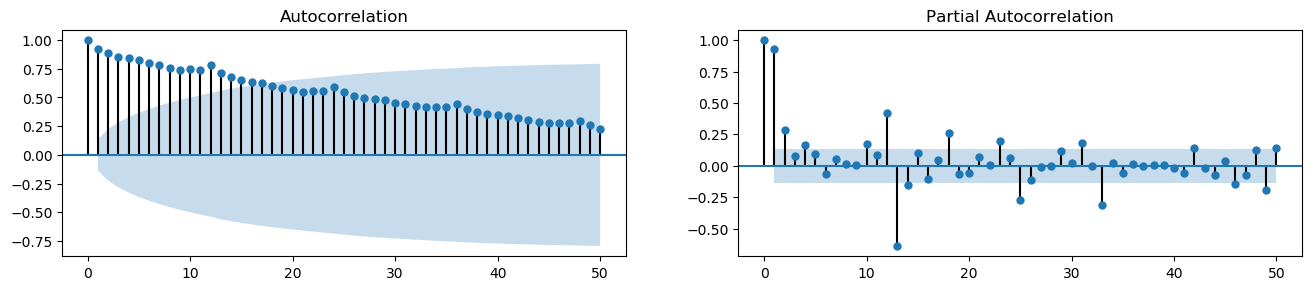

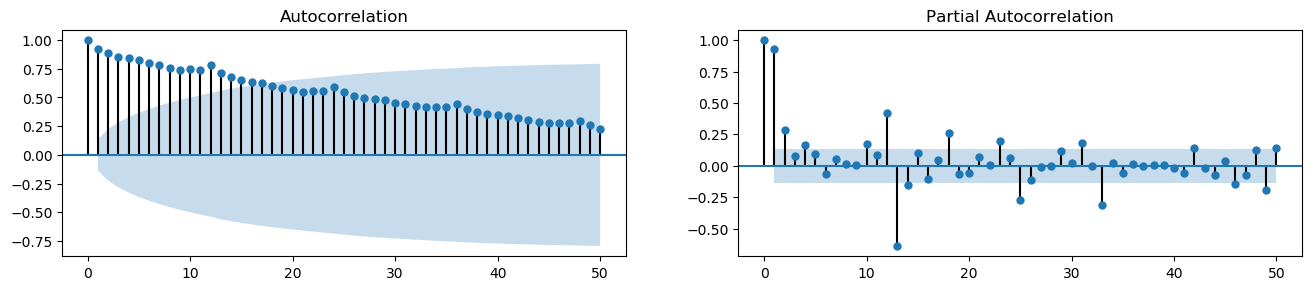

In [41]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize = (16, 3), dpi = 100)
plot_acf(df.value.tolist(), lags = 50, ax = axes[0])
plot_pacf(df.value.tolist(), lags = 50, ax = axes[1])

### moving average: smoothen the series

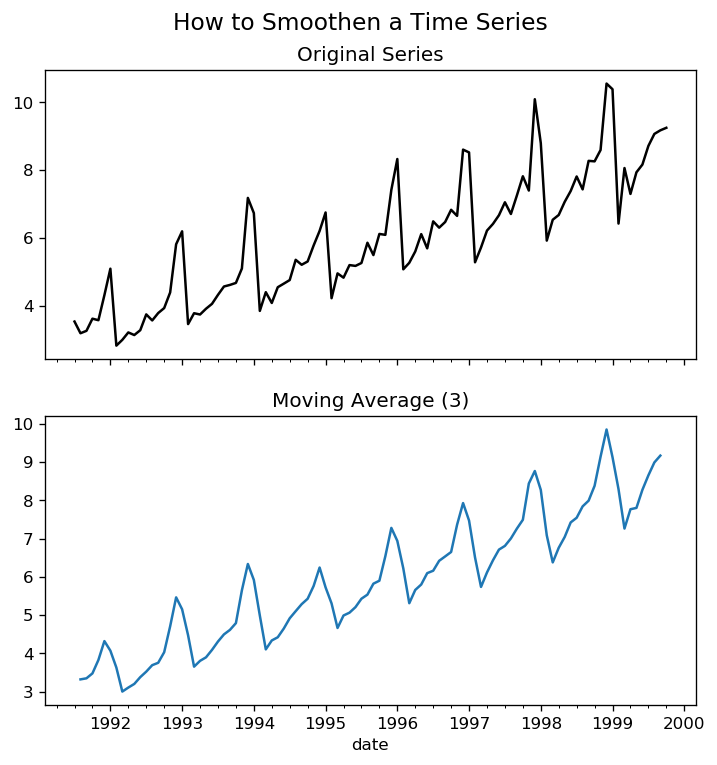

In [44]:
df_ma = df_orig.value.rolling(3, center = True, closed = 'both').mean()

fig, axes = plt.subplots(2,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

### ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

### An ARIMA model is characterized by 3 terms: p, d, q. where, p is the order of the AR term, q is the order of the MA term, d is the number of differencing required to make the time series stationary

### If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.

### Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

### ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

### The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed. The value of d, therefore, is the minimum number of differencing needed to make the series stationary. 

In [48]:
# detect whether the original series is stationary
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(result)
# p-value is greater than the significance level
# cannot reject null hepothesis, non-staionary

ADF Statistic: 3.145186
p-value: 1.000000
(3.1451856893067296, 1.0, 15, 188, {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}, 549.6705685364172)


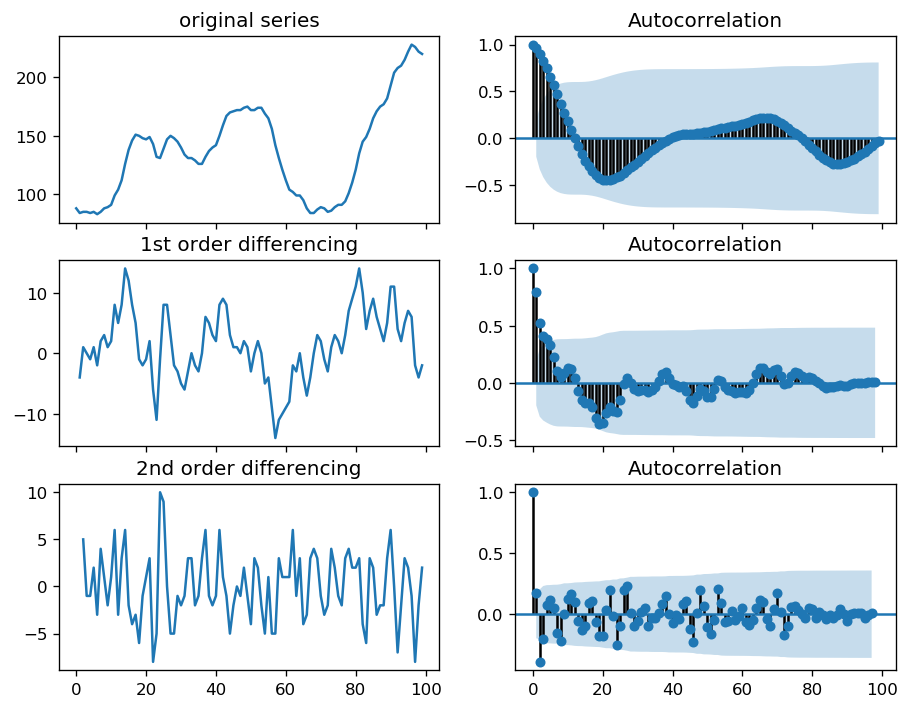

In [54]:
# difference
plt.rcParams.update({'figure.figsize':(9, 7), 'figure.dpi':120})

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# original series
fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(df.value)
axes[0, 0].set_title('original series')
plot_acf(df.value, ax = axes[0, 1])

# 1st differencing
axes[1, 0].plot(df.value.diff())
axes[1, 0].set_title('1st order differencing')
plot_acf(df.value.diff().dropna(), ax = axes[1, 1])

# 2nd differencing
axes[2, 0].plot(df.value.diff().diff());
axes[2, 0].set_title('2nd order differencing')
plot_acf(df.value.diff().diff().dropna(), ax = axes[2, 1])
plt.show()

### For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.
### So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

### The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


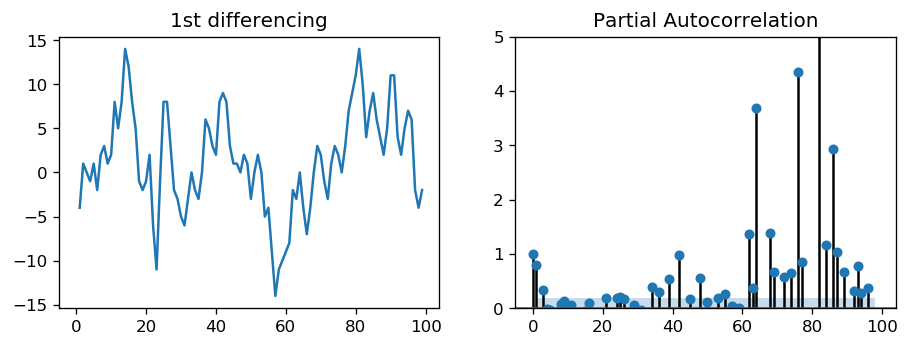

In [2]:
# pacf plot of 1st differenced series
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

plt.rcParams.update({'figure.figsize':(9, 3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(df.value.diff())
axes[0].set_title('1st differencing')
axes[1].set(ylim = (0, 5))
plot_pacf(df.value.diff().dropna(), ax = axes[1])
plt.show()

### You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But I am going to be conservative and tentatively fix the p as 1.

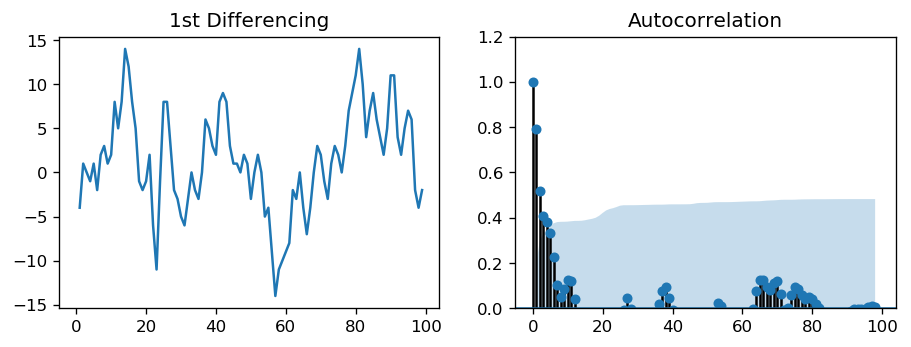

In [3]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

### Couple of lags are well above the significance line. So, let’s tentatively fix q as 2

## build arima model

In [6]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.value, order = (1,1,2))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Fri, 01 Oct 2021   AIC                            517.579
Time:                        21:41:13   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.387      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.015       0.131       1.139
ma.L1.D.value     0.5287      0.355     

In [7]:
# ma2 insignificant
model = ARIMA(df.value, order = (1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# AIC reduces, good

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Fri, 01 Oct 2021   AIC                            515.579
Time:                        21:44:20   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1205      1.286      0.871      0.386      -1.400       3.641
ar.L1.D.value     0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.value     0.5297      0.089     

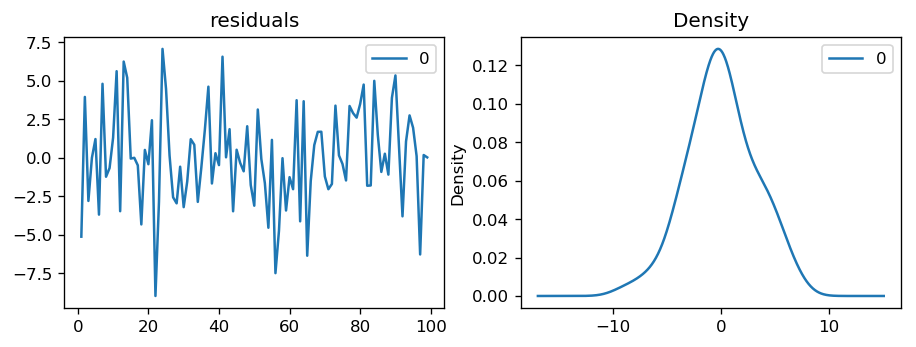

In [11]:
# plot residual error
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'residuals',ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()
# The residual errors seem fine with near zero mean and uniform variance.

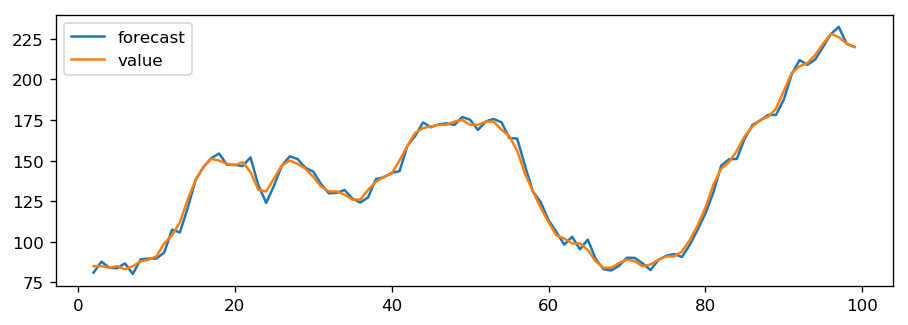

In [12]:
model_fit.plot_predict(dynamic = False)
plt.show()

### In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

### To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

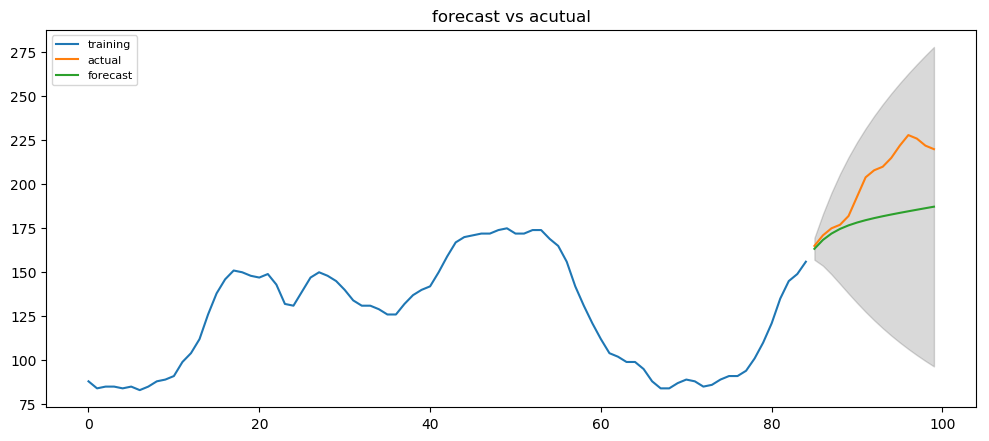

In [13]:
# create training and test
train = df.value[:85]
test = df.value[85:]

# build model
model = ARIMA(train, order = (1,1,1))
fitted = model.fit(disp = -1)

# forecast
fc, se, conf = fitted.forecast(15, alpha = 0.05)  # 95% conf

fc_series = pd.Series(fc, index = test.index)
lower_series = pd.Series(conf[:, 0], index = test.index)
upper_series = pd.Series(conf[:, 1], index = test.index)

plt.figure(figsize = (12, 5), dpi = 100)
plt.plot(train, label = 'training')
plt.plot(test, label = 'actual')
plt.plot(fc_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = .15)
plt.title('forecast vs acutual')
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

### From the chart, the ARIMA(1,1,1) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That seems fine.

### But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.

### So, what I am going to do is to increase the order of differencing to two, that is set d=2 and iteratively increase p to up to 5 and then q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

### While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.248
Method:                       css-mle   S.D. of innovations              3.153
Date:                Fri, 01 Oct 2021   AIC                            440.497
Time:                        22:03:35   BIC                            455.010
Sample:                             2   HQIC                           446.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0483      0.084      0.577      0.565      -0.116       0.212
ar.L1.D2.value     1.1386      0.109     10.399      0.000       0.924       1.353
ar.L2.D2.value    -0.5923      0.155

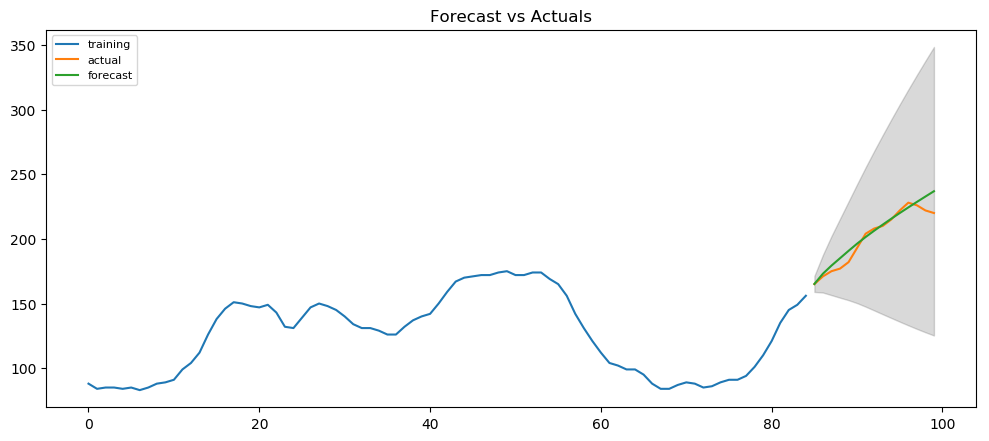

In [14]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Ideally, you should go back multiple points in time, like, go back 1, 2, 3 and 4 quarters and see how your forecasts are performing at various points in the year.

### The commonly used accuracy metrics to judge forecasts are:

In [ ]:
Mean Absolute Percentage Error (MAPE)
Mean Error (ME)
Mean Absolute Error (MAE)
Mean Percentage Error (MPE)
Root Mean Squared Error (RMSE)
Lag 1 Autocorrelation of Error (ACF1)
Correlation between the Actual and the Forecast (corr)
Min-Max Error (minmax)

In [16]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.022501325134767776,
 'me': 3.2307892948981816,
 'mae': 4.5483245347888746,
 'mpe': 0.016421031161945605,
 'rmse': 6.373242503283231,
 'acf1': 0.5105505389613623,
 'corr': 0.9674576482142632,
 'minmax': 0.02163155809855366}

### Around 2.2% MAPE implies the model is about 97.8% accurate in predicting the next 15 observations.

### automate the best model

In [18]:
import pmdarima as pm


In [19]:
model = pm.auto_arima(df.value, 
                      start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

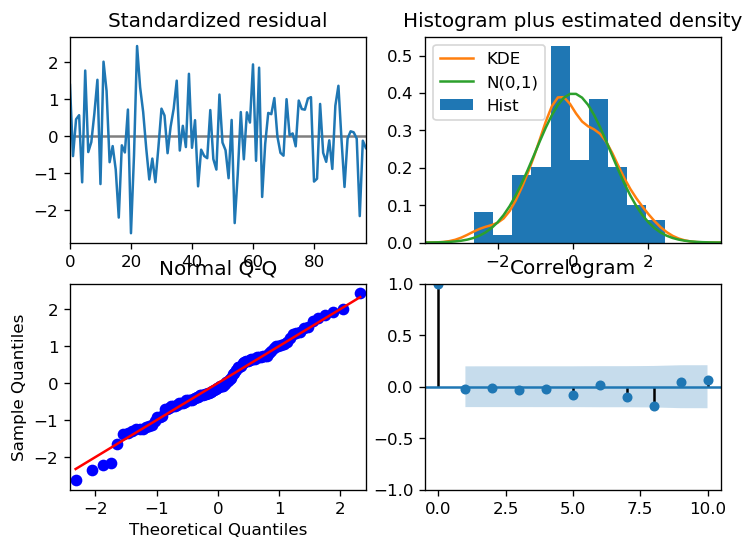

In [20]:
model.plot_diagnostics(figsize = (7,5))
plt.show()

### Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

### Top Right: The density plot suggest normal distribution with mean zero.

### Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

### Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

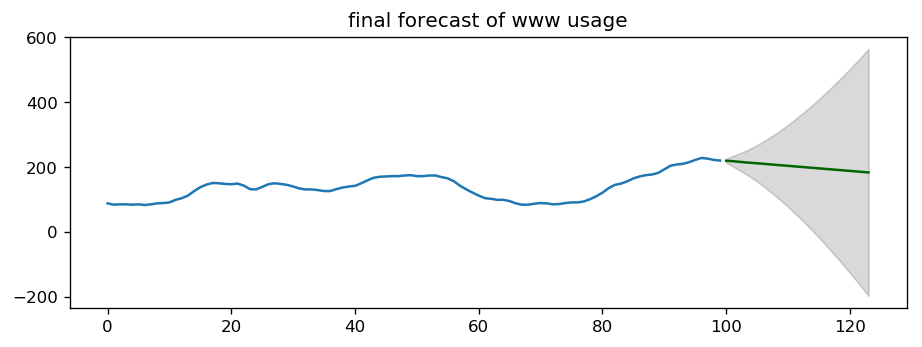

In [23]:
# forecast

fc, confint = model.predict(n_periods = 24, return_conf_int = True)
index_of_fc = np.arange(len(df.value), len(df.value)+24)

fc_series = pd.Series(fc, index = index_of_fc)
lower_series = pd.Series(confint[:, 0], index = index_of_fc)
upper_series = pd.Series(confint[:, 1], index = index_of_fc)

plt.plot(df.value)
plt.plot(fc_series, color = 'darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color = 'k', alpha = .15)
plt.title('final forecast of www usage')
plt.show()

### automatically build SARIMA model in python: The problem with plain ARIMA model is it does not support seasonality. If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.

### So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

### As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.

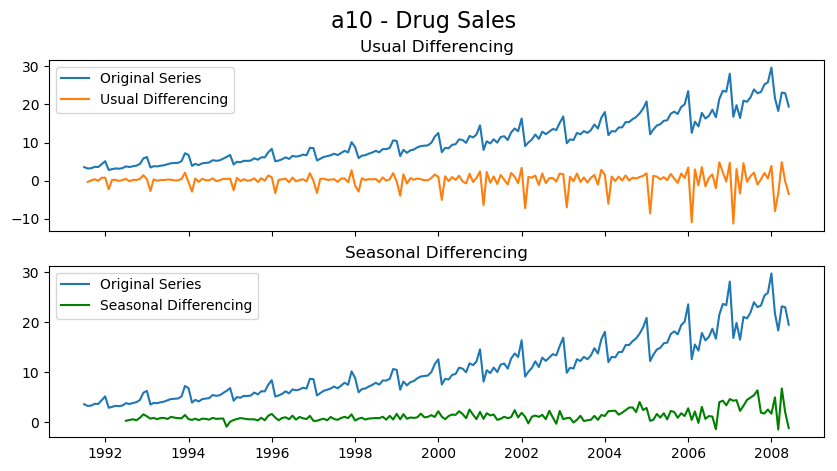

In [24]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [25]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,  # month
                         start_P=0, seasonal=True,  # seasonal
                         d=None, D=1, trace=True,   # D=1
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.004, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.29 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=4.32 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=542.587, Time=1.43 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.42 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.28 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.49 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=531

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(3, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -258.300
Date:                            Fri, 01 Oct 2021   AIC                            528.601
Time:                                    22:50:29   BIC                            548.146
Sample:                                         0   HQIC                           536.517
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1649      0.097      1.705      0.088      -0.025       0.354
ar.L1          0.0949      0.043      2.205      0.027       0.011       0.179
ar.L2          0.4145      0.035     11.907      0.000       0.346       0.483
ar.L3          0.3531      0.053      6.601      0.000       0.248       0.458
ma.S.L12      -0.4635      0.058     -8.008      0.000      -0.577      -0.350
sigma2         0.8461      0.057     14.925      0.000       0.735       0.957
===================================================================================
Ljung-Box (Q):                       59.80   Jarque-Bera (JB):               124.59
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.75   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

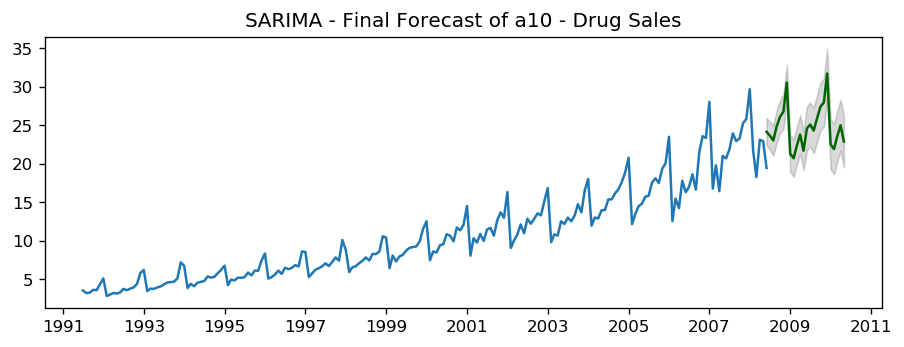

In [26]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

### But for the sake of completeness, let’s try and force an external predictor, also called, ‘exogenous variable’ into the model. This model is called the SARIMAX model.

In [27]:
# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=1.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.004, Time=0.67 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.19 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.50 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.32 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=5.55 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=544.587, Time=1.18 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.35 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=1.23 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.41 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.41 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=533

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(3, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -258.300
Date:                            Fri, 01 Oct 2021   AIC                            530.601
Time:                                    23:00:29   BIC                            553.403
Sample:                                07-01-1991   HQIC                           539.836
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.1649      0.097      1.705      0.088      -0.025       0.354
seasonal_index  3.928e-07   2.41e-09    162.912      0.000    3.88e-07    3.98e-07
ar.L1              0.0949      0.043      2.205      0.027       0.011       0.179
ar.L2              0.4145      0.035     11.907      0.000       0.346       0.483
ar.L3              0.3531      0.053      6.601      0.000       0.248       0.458
ma.S.L12          -0.4635      0.058     -8.008      0.000      -0.577      -0.350
sigma2             0.8461      0.057     14.925      0.000       0.735       0.957
===================================================================================
Ljung-Box (Q):                       59.80   Jarque-Bera (JB):               124.59
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.75   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.55e+17. Standard errors may be unstable.
"""

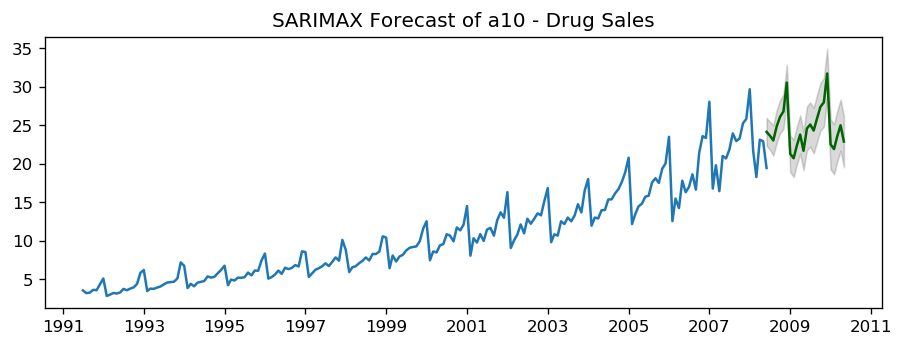

In [28]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

In [ ]:
data_orig['Date'] = pd.to_datetime(data_orig['Date']) # convert date column to DateTime

adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))

df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])

monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)

weekly_moving_average = df['Mean temparature'].rolling(7).mean()

autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
